### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [449]:
import pandas as pd

In [ ]:
# место для кода
fixed_df = pd.read_csv('data.csv', delimiter=',')
print(fixed_df)

       RefId  IsBadBuy  PurchDate  ... VehBCost  IsOnlineSale  WarrantyCost
0          1         0  12/7/2009  ...   7100.0             0          1113
1          2         0  12/7/2009  ...   7600.0             0          1053
2          3         0  12/7/2009  ...   4900.0             0          1389
3          4         0  12/7/2009  ...   4100.0             0           630
4          5         0  12/7/2009  ...   4000.0             0          1020
...      ...       ...        ...  ...      ...           ...           ...
72978  73010         1  12/2/2009  ...   4200.0             0           993
72979  73011         0  12/2/2009  ...   6200.0             0          1038
72980  73012         0  12/2/2009  ...   8200.0             0          1893
72981  73013         0  12/2/2009  ...   7000.0             0          1974
72982  73014         0  12/2/2009  ...   8000.0             0          1313

[72983 rows x 34 columns]


In [450]:
fixed_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [451]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'MMRCurrentRetailAveragePrice')

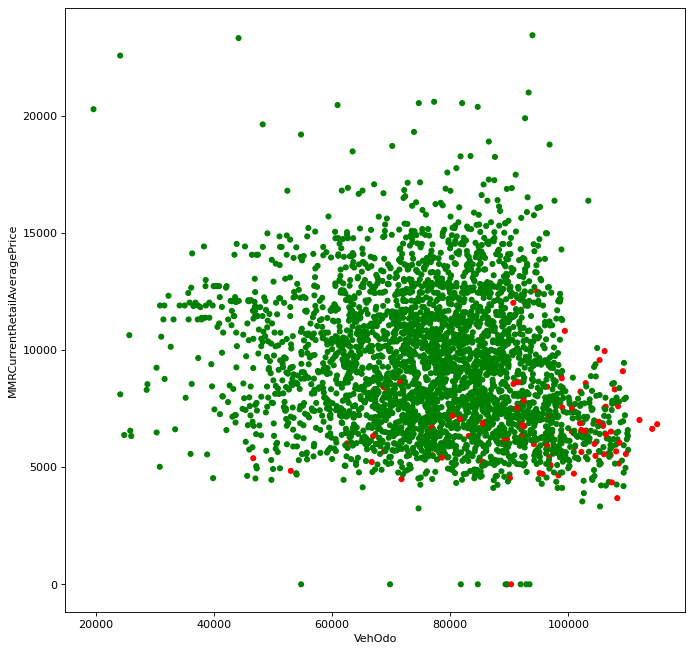

In [452]:
# место для кода
# место для кода
colors = {'GREEN':'green', 'RED': 'red'}
i = fixed_df['AUCGUART'].notna()
filter = fixed_df.loc[i, 'AUCGUART']

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(fixed_df.loc[i,'VehOdo'], fixed_df.loc[i,'MMRCurrentRetailAveragePrice'], 
            c=[colors[i] for i in filter], s = 20)
plt.xlabel("VehOdo")
plt.ylabel("MMRCurrentRetailAveragePrice")

In [453]:
filter = fixed_df.loc[fixed_df['AUCGUART'].notna(), 'AUCGUART']
print(filter.drop_duplicates())

275     GREEN
1123      RED
Name: AUCGUART, dtype: object


# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [454]:
# место для кода
from sklearn import datasets, linear_model

In [455]:
res = fixed_df.loc[fixed_df['MMRCurrentRetailAveragePrice'].notna(), 'MMRCurrentRetailAveragePrice'].describe()
print(res)

count    72668.000000
mean      8775.723331
std       3090.702941
min          0.000000
25%       6536.000000
50%       8729.000000
75%      10911.000000
max      39080.000000
Name: MMRCurrentRetailAveragePrice, dtype: float64


In [505]:
i = (fixed_df['AUCGUART'].notna()) & (fixed_df['VehOdo'].notna()) & (fixed_df['MMRCurrentRetailAveragePrice'].notna())& (fixed_df['MMRCurrentRetailAveragePrice'] > 0)
X = fixed_df.loc[i,['VehOdo','MMRCurrentRetailAveragePrice']]

dataColor = {'GREEN':0, 'RED': 1}
filter = fixed_df.loc[i,'AUCGUART']
y = [dataColor[i] for i in filter]
y = np.array(y, dtype=np.int64)
y = pd.DataFrame(y)

Xdata = X.values.reshape(len(X), 2)
ydata = y.values.reshape(len(y), 1)

In [506]:
print(Xdata.shape)
print(Xdata.dtype)
print(ydata.shape)
print(ydata.dtype)

(3395, 2)
float64
(3395, 1)
int64


In [507]:
X_train = Xdata[:-20]
y_train = ydata[:-20]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [508]:
print(regr.intercept_)
print(regr.coef_)

[-0.03290872]
[[ 1.33767985e-06 -5.33694455e-06]]


## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [509]:
# место для кода
# Make predictions using the testing set
X_test = Xdata[-20:]
y_test = ydata[-20:]

y_pred = regr.predict(X_test)

In [510]:
print(y_pred.dtype)
print(y_test.dtype)

float64
int64


## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [511]:
# место для кода
predictionClass = [1 if y_pred[i] > 0.05 else 0 for i in range(y_pred.shape[0])]

In [512]:
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': predictionClass})
df

,Actual,Predicted
0,0,1
1,0,0
2,1,0
3,1,1
4,0,1
5,0,0
6,1,0
7,0,1
8,0,0
9,1,0


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [513]:
print(y_test.shape)
print(y_pred.shape)

(20, 1)
(20, 1)


In [515]:
# место для кода
print(metrics.classification_report(y_test, predictionClass))

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.38      0.30      0.33        10

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.39        20
weighted avg       0.40      0.40      0.39        20



In [516]:
print(metrics.confusion_matrix(y_test, predictionClass))

[[5 5]
 [7 3]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [517]:
from sklearn.tree import DecisionTreeClassifier

In [523]:
# место для кода
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [524]:
# место для кода
y_pred = tree.predict_proba(X_test)

In [525]:
print(y_pred)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [526]:
# место для кода
predictionClass = [1 if y_pred[i] > 0.05 else 0 for i in range(y_pred.shape[0])]

ValueError: ignored

In [ ]:
print(metrics.classification_report(y_test, predictionClass))

In [ ]:
print(metrics.confusion_matrix(y_test, predictionClass))

# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [536]:
# место для кода
length = round(len(ydata)/2)
dataTrain = ydata[0:length-1]
dataTest = ydata[length:]

In [537]:
print(length)
print(ydata.shape)
print(dataTrain.shape)
print(dataTest.shape)

1698
(3395, 1)
(1697, 1)
(1697, 1)


## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [538]:
# место для кода
metrics.accuracy_score(dataTrain, dataTest)

0.9552150854449027

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [ ]:
# место для кода

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [ ]:
# место для кода